# US Army Anthropometric Survey (ANSUR II) ML Final Project 

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
plt.rcParams["figure.figsize"] = (8,5)
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

from sklearn.metrics import roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Tum satir ve sutunlari gorebilmek icin 
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

## Read Data

In [2]:
dfm=pd.read_csv("ANSUR II MALE Public.csv", encoding='iso-8859-1')
dfm.head(2)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand


In [3]:
dffm=pd.read_csv("ANSUR II FEMALE Public.csv")
dffm.head(2)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand


In [4]:
dfm.shape

(4082, 108)

In [6]:
dffm.shape

(1986, 108)

In [6]:
dfm.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=108)

In [7]:
dffm.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=108)

In [7]:
# Data setlerinin sutunlari ayni. Bu iki data frame'i concat edelim;

df = pd.concat([dfm, dffm], axis=0, ignore_index=True)
df.head(3)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN


In [137]:
df.shape

(6068, 109)

In [10]:
# Normalinde her iki data setinde de 108 sutun varken, concat edince 109'a cikti. 
# Bunu  sebebini inceledigimizde personel id lerinin erkeklerde -->'subjectid', 
# kadinlarda --> 'SubjectId' seklinde yazilmis oldugu goruldu. Bu sorunu duzeltebilmek icin 
# kadinlarin id leri de kucuk harfe cevrildi.

In [8]:
dffm.rename(columns = {'SubjectId': 'subjectid'}, inplace = True) 
dffm.head(2)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand


In [9]:
# Concat islemi burada tekrar yapildi; 
df = pd.concat([dfm, dffm], axis=0, ignore_index=True)
df.head(3)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand


In [10]:
df.shape

(6068, 108)

* data frame'de 6068 satir, 108 sutun var. 

## Info

In [14]:
df.info(verbose=True) # verbose=True demezsek detayli gostermiyor. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

## Null Check

In [15]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

* Ethnicity sutununda 4647 tane null deger var. 

In [11]:
# Null deger olan gozlemi drop edelim;

df = df.drop(columns = ["Ethnicity"])

In [142]:
# Null deger var mi bakalim;

df.isnull().sum()[df.isnull().sum()>0]   # Yok

Series([], dtype: int64)

In [45]:
df.duplicated().sum() # Duplicate deger yok. 

0

In [12]:
df.shape

(6068, 107)

* "Ethnicity" drop edilince 107 sutun ve 6068 satirlik veri kaldi.

## Drop

- Drop unnecessary colums

In [20]:
df.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=107)

In [13]:
# Drop
df = df.drop(columns=['subjectid', "Date","SubjectNumericRace", 'SubjectsBirthLocation', 'Heightin', 'Weightlbs', 'WritingPreference', "PrimaryMOS", "Installation"])
df.shape

(6068, 98)

In [14]:
df.shape

(6068, 98)

### Target Variable

In [15]:
# Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
# Once elimizde ne var ona bakalim; 

race_value_counts = df['DODRace'].value_counts()
race_value_counts

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [16]:
# Burada 500'den az gozlem olan 4, 5, 6 ve 8 nolu irklari drop edelim; 

# Find races with counts below 500
races_below_threshold = race_value_counts[race_value_counts < 500].index
races_below_threshold


# Drop rows with races below the threshold
df = df[~df['DODRace'].isin(races_below_threshold)]

In [17]:
race_value_counts = df['DODRace'].value_counts()
race_value_counts

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [18]:
df.shape

(5769, 98)

* Son durumda elimizde 5769 satir ve 98 sutundan olusan bir veri seti kaldi. 

Targettte yer alan:

                1 ---> White 

                2 ---> Black 

                3 ---> Hispanic 
askerleri gostermektedir.

**Data setine ait aciklamalar arasinda agirliklarun 10 ile carpildigi bilgisi de yer almakta.** 

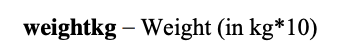

In [19]:
# Bu islemi geriye cevirelimve agirlikalr normal hale gelsin;

df["weightkg"] = df["weightkg"] / 10 

## Copy Data

In [20]:
df1=df.copy()

## Datayi Disa Aktaralim

In [21]:
df.to_csv("clean.csv", index = False)

In [129]:
df = pd.read_csv("clean.csv")

In [23]:
df.head(2)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,DODRace,Age
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,81.5,175,853,Male,Regular Army,Combat Arms,1,41
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,72.6,167,815,Male,Regular Army,Combat Support,1,35


In [24]:
df.shape

(5769, 98)

## Balanced Check

In [130]:
# target variable; DODRace; Askerlerin 
# Tarhet variable gore data balance mi?

df["DODRace"].value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

* Elimizde kalan data dengeli (balanced) degil. **Unbalanced** dir.

* Askerlerden 

  3792 tanesi (1) White 
  
  1298 tanesi (2) Black
  
  679 tanesi (3)  Hispanic  tir.

## Data Visulation

In [131]:
# Kategorik verileri inceleyelim;
for col in df.select_dtypes("object"):
  print(f"{col} {df[col].nunique()}")

Gender 2
Component 3
Branch 3


### Countplot for Catecoricial Features

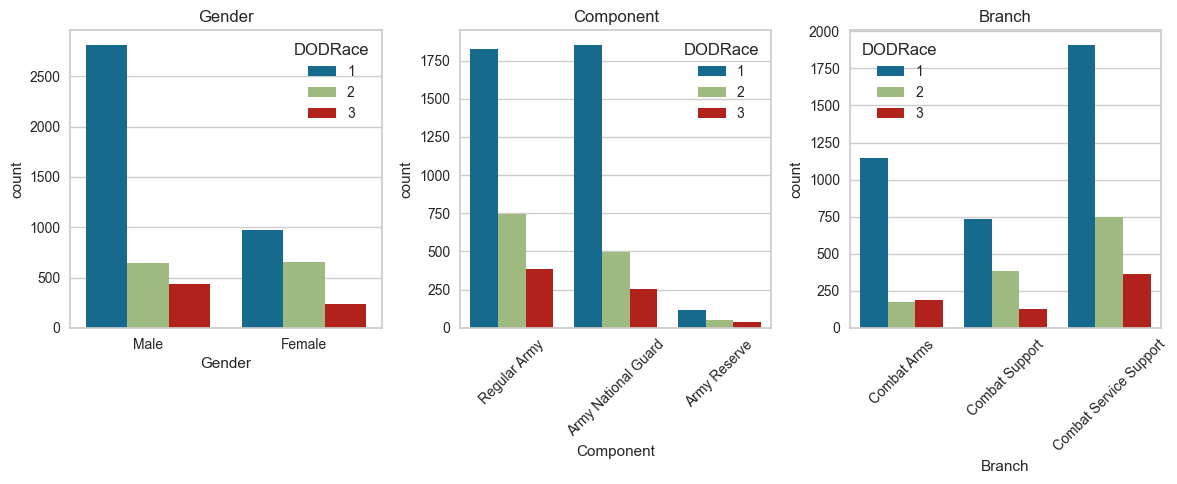

In [64]:
plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1)  # 1 satır, 2 sütunlu bir gridin ilk sütunu
#sns.scatterplot(data=pca_df, x="Component 1", y="Component 2", hue = "room", palette = "deep")
sns.countplot(data=df, x='Gender', hue='DODRace')
plt.title("Gender")

plt.subplot(1, 3, 2)  # 1 satır, 2 sütunlu bir gridin ilk sütunu
#sns.scatterplot(data=pca_df, x="Component 1", y="Component 2", hue = "room", palette = "deep")
sns.countplot(data=df, x='Component', hue='DODRace')
plt.xticks(rotation=45)
plt.title("Component")

plt.subplot(1, 3, 3)  # 1 satır, 2 sütunlu bir gridin ilk sütunu
#sns.scatterplot(data=pca_df, x="Component 1", y="Component 2", hue = "room", palette = "deep")
sns.countplot(data=df, x='Branch', hue='DODRace')
plt.xticks(rotation=45)
plt.title("Branch")
plt.tight_layout();

* Bu grafiklere gore;

1) Kadinlarda siyahi kisi sayisi daha fazla.

2) Component olarak adlandirilan askerlik siniflandirmasinda Army National Guard kisminda yer alan beyaz kisilerin sayisinin Rehular Army sinifinda yer alan beyaz kisilerden daha fazla oldugu goruluyor.

3) En onde savasan askerler (Regular Army) sinifinda zencilerin hispaniclerden az oldugu, beyazlarin buyuk cogunlugunun "konmuta" merkezi denilen "Combat Service Support" kisminda yer aldigi gorulmektedir.   

### Scatterplot for Continious Features

In [65]:
# Continious verileri inceleyelim;
for col in df.select_dtypes("int64"):
  print(f"{col} {df[col].nunique()}")

abdominalextensiondepthsitting 218
acromialheight 425
acromionradialelength 129
anklecircumference 110
axillaheight 396
balloffootcircumference 107
balloffootlength 84
biacromialbreadth 167
bicepscircumferenceflexed 236
bicristalbreadth 132
bideltoidbreadth 239
bimalleolarbreadth 37
bitragionchinarc 107
bitragionsubmandibulararc 124
bizygomaticbreadth 48
buttockcircumference 426
buttockdepth 159
buttockheight 315
buttockkneelength 204
buttockpopliteallength 176
calfcircumference 195
cervicaleheight 445
chestbreadth 131
chestcircumference 520
chestdepth 160
chestheight 415
crotchheight 308
crotchlengthomphalion 271
crotchlengthposterioromphalion 179
earbreadth 22
earlength 36
earprotrusion 22
elbowrestheight 176
eyeheightsitting 235
footbreadthhorizontal 49
footlength 104
forearmcenterofgriplength 141
forearmcircumferenceflexed 167
forearmforearmbreadth 332
forearmhandlength 178
functionalleglength 374
handbreadth 38
handcircumference 85
handlength 78
headbreadth 47
headcircumference 12

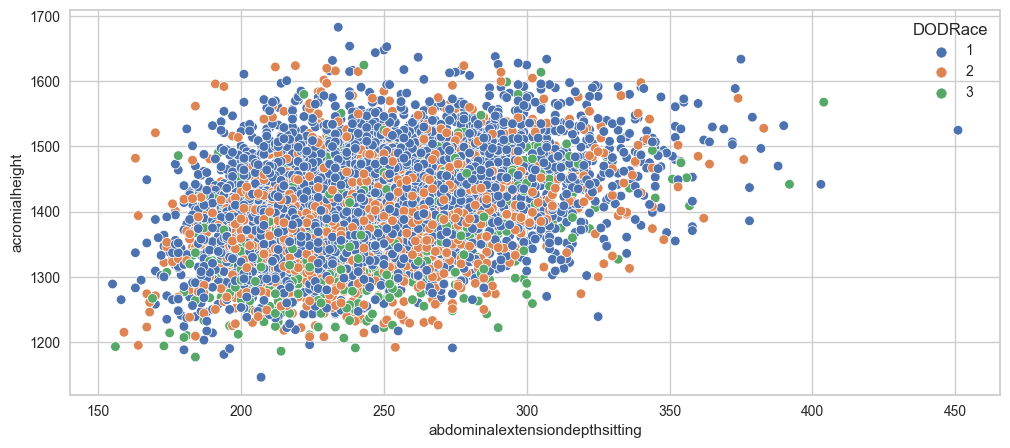

In [66]:
plt.figure(figsize=(12,5))

sns.scatterplot(data=df, x="abdominalextensiondepthsitting", y="acromialheight", hue = "DODRace", palette = "deep");

In [ ]:
* 2D grafikte tam bir ayrim yapilamdigi goruluyor. 3D grafikle bakalim;

### 3D Figure 

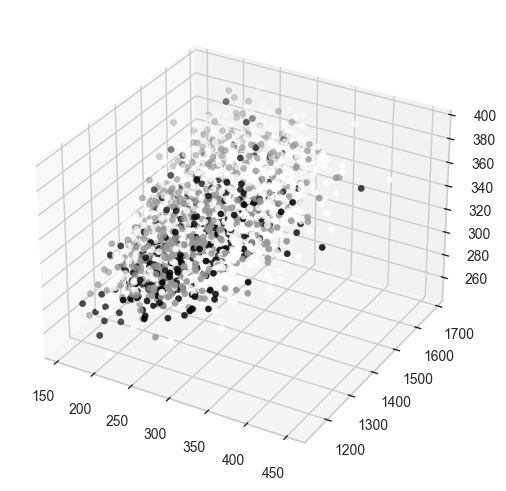

In [70]:
# Sabit

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['abdominalextensiondepthsitting'], df['acromialheight'], df['acromionradialelength'], c=df['DODRace'])
plt.show()

In [26]:
# Hareketli

import plotly.express as px

fig = px.scatter_3d(x=df['abdominalextensiondepthsitting'], y=df['acromialheight'], 
                    z=df['acromionradialelength'], color=df["DODRace"])
fig.show()

* Askerlerin irklarinin 3D grafikte de tam ayrismadigi gorulmektedir. 

### Outlier Analysis by Boxplot

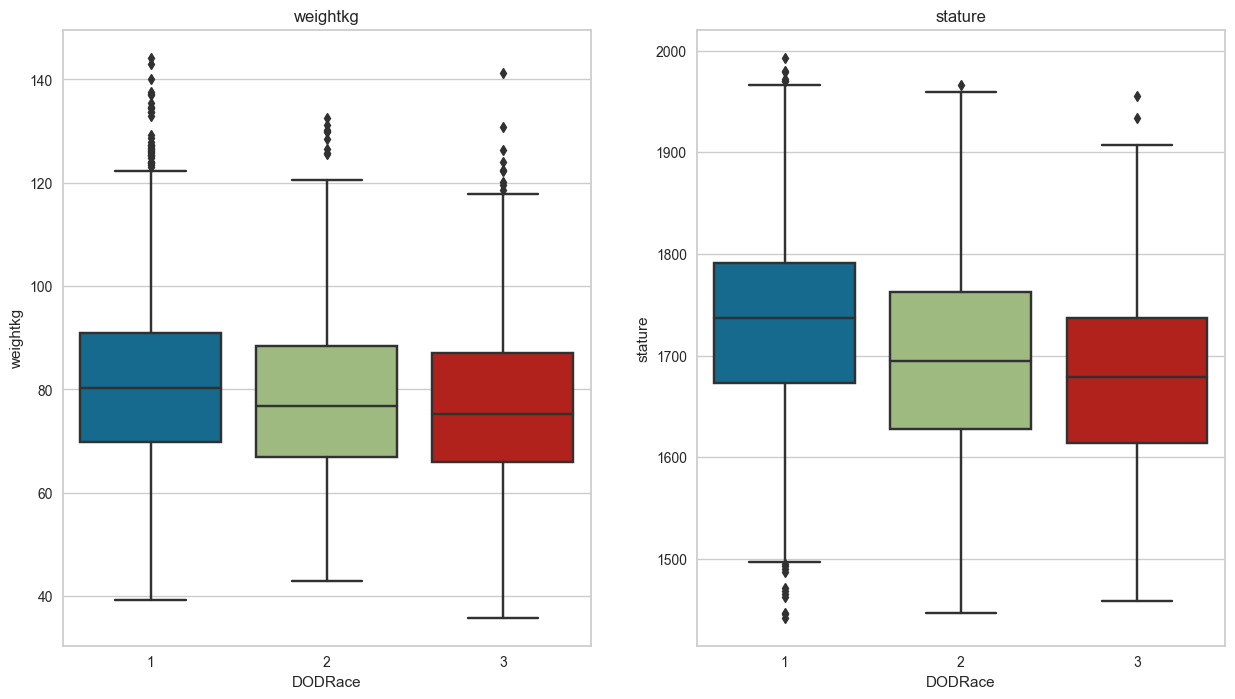

In [80]:
index = 0
plt.figure(figsize=(15,8))
for feature in df[["weightkg","stature"]].columns:
    if feature != "DODRace":
        index += 1
        plt.subplot(1,2,index)
        sns.boxplot(x='DODRace', y=feature, data=df)
        plt.title(feature)
        
plt.show()

* Bu grafiklerde boy ve agirlikalrda outlier olarak degerlendirilebilecek degerler olsa da gercek hayatta bunlarin olabilecvegi dusunulerek bu degerler drop edilmemsitir. 

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

## Labeling

In [156]:
df.head(2)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,DODRace,Age
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,81.5,175,853,Male,Regular Army,Combat Arms,1,41
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,72.6,167,815,Male,Regular Army,Combat Support,1,35


In [254]:
df.shape

(5769, 98)

In [132]:
X = df.drop(columns="DODRace")
y = df.DODRace

In [133]:
X.shape

(5769, 97)

## Encoding

Encoding islemini Column_transformer kutuphanesini kullanarak gerceklestirelim. 

In [134]:
categoricial_featrues= df.select_dtypes("object").columns
categoricial_featrues

Index(['Gender', 'Component', 'Branch'], dtype='object')

In [135]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categoricial_featrues = ["Gender", "Component", "Branch"] # Kategorik verilerin bulundugu sutunlari secelim 

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False), categoricial_featrues), 
                                       remainder='passthrough')

In [248]:
X.head(2)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,Age
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,81.5,175,853,Male,Regular Army,Combat Arms,41
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,72.6,167,815,Male,Regular Army,Combat Support,35


In [136]:
X = column_trans.fit_transform(X)

In [137]:
features = column_trans.get_feature_names_out()
X= pd.DataFrame(X, columns=features)
X.head()

,onehotencoder__Gender_Male,onehotencoder__Component_Army Reserve,onehotencoder__Component_Regular Army,onehotencoder__Branch_Combat Service Support,onehotencoder__Branch_Combat Support,remainder__abdominalextensiondepthsitting,remainder__acromialheight,remainder__acromionradialelength,remainder__anklecircumference,remainder__axillaheight,remainder__balloffootcircumference,remainder__balloffootlength,remainder__biacromialbreadth,remainder__bicepscircumferenceflexed,remainder__bicristalbreadth,remainder__bideltoidbreadth,remainder__bimalleolarbreadth,remainder__bitragionchinarc,remainder__bitragionsubmandibulararc,remainder__bizygomaticbreadth,remainder__buttockcircumference,remainder__buttockdepth,remainder__buttockheight,remainder__buttockkneelength,remainder__buttockpopliteallength,remainder__calfcircumference,remainder__cervicaleheight,remainder__chestbreadth,remainder__chestcircumference,remainder__chestdepth,remainder__chestheight,remainder__crotchheight,remainder__crotchlengthomphalion,remainder__crotchlengthposterioromphalion,remainder__earbreadth,remainder__earlength,remainder__earprotrusion,remainder__elbowrestheight,remainder__eyeheightsitting,remainder__footbreadthhorizontal,remainder__footlength,remainder__forearmcenterofgriplength,remainder__forearmcircumferenceflexed,remainder__forearmforearmbreadth,remainder__forearmhandlength,remainder__functionalleglength,remainder__handbreadth,remainder__handcircumference,remainder__handlength,remainder__headbreadth,remainder__headcircumference,remainder__headlength,remainder__heelanklecircumference,remainder__heelbreadth,remainder__hipbreadth,remainder__hipbreadthsitting,remainder__iliocristaleheight,remainder__interpupillarybreadth,remainder__interscyei,remainder__interscyeii,remainder__kneeheightmidpatella,remainder__kneeheightsitting,remainder__lateralfemoralepicondyleheight,remainder__lateralmalleolusheight,remainder__lowerthighcircumference,remainder__mentonsellionlength,remainder__neckcircumference,remainder__neckcircumferencebase,remainder__overheadfingertipreachsitting,remainder__palmlength,remainder__poplitealheight,remainder__radialestylionlength,remainder__shouldercircumference,remainder__shoulderelbowlength,remainder__shoulderlength,remainder__sittingheight,remainder__sleevelengthspinewrist,remainder__sleeveoutseam,remainder__span,remainder__stature,remainder__suprasternaleheight,remainder__tenthribheight,remainder__thighcircumference,remainder__thighclearance,remainder__thumbtipreach,remainder__tibialheight,remainder__tragiontopofhead,remainder__trochanterionheight,remainder__verticaltrunkcircumferenceusa,remainder__waistbacklength,remainder__waistbreadth,remainder__waistcircumference,remainder__waistdepth,remainder__waistfrontlengthsitting,remainder__waistheightomphalion,remainder__weightkg,remainder__wristcircumference,remainder__wristheight,remainder__Age
0,1.0,0.0,1.0,0.0,0.0,266.0,1467.0,337.0,222.0,1347.0,253.0,202.0,401.0,369.0,274.0,493.0,71.0,319.0,291.0,142.0,979.0,240.0,882.0,619.0,509.0,373.0,1535.0,291.0,1074.0,259.0,1292.0,877.0,607.0,351.0,36.0,71.0,19.0,247.0,802.0,101.0,273.0,349.0,299.0,575.0,477.0,1136.0,90.0,214.0,193.0,150.0,583.0,206.0,326.0,70.0,332.0,366.0,1071.0,685.0,422.0,441.0,502.0,560.0,500.0,77.0,391.0,118.0,400.0,436.0,1447.0,113.0,437.0,273.0,1151.0,368.0,145.0,928.0,883.0,600.0,1782.0,1776.0,1449.0,1092.0,610.0,164.0,786.0,491.0,140.0,919.0,1700.0,501.0,329.0,933.0,240.0,440.0,1054.0,81.5,175.0,853.0,41.0
1,1.0,0.0,1.0,0.0,1.0,233.0,1395.0,326.0,220.0,1293.0,245.0,193.0,394.0,338.0,257.0,479.0,67.0,344.0,320.0,135.0,944.0,232.0,870.0,584.0,468.0,357.0,1471.0,269.0,1021.0,253.0,1244.0,851.0,615.0,376.0,33.0,62.0,18.0,232.0,781.0,98.0,263.0,348.0,289.0,523.0,476.0,1096.0,86.0,203.0,195.0,146.0,568.0,201.0,334.0,72.0,312.0,356.0,1046.0,620.0,441.0,447.0,490.0,540.0,488.0,73.0,371.0,131.0,380.0,420.0,1380.0,118.0,417.0,254.0,1119.0,353.0,141.0,884.0,868.0,564.0,1745.0,1702.0,1387.0,1076.0,572.0,169.0,822.0,476.0,120.0,918.0,1627.0,4

In [33]:
X.shape

(5769, 99)

## Train | Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape, X_test.shape

((4615, 99), (1154, 99))

## Scalling

Scalling islemini pipline icinde vermeyi tercih ettik

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## Logistic model

### Vanilla Logistic Model

Vanilla modelin anlami; default degerler ile model kurulmasidir.

Pipline ile kuralim;

In [36]:
operations = [("scaler",StandardScaler()),("logistic", LogisticRegression())]

log_pipe = Pipeline(steps=operations)

log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

#### Eval Metrics

In [37]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print()
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
           
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[703   7  23]
 [ 26 247   9]
 [ 80  15  44]]
              precision    recall  f1-score   support

           1       0.87      0.96      0.91       733
           2       0.92      0.88      0.90       282
           3       0.58      0.32      0.41       139

    accuracy                           0.86      1154
   macro avg       0.79      0.72      0.74      1154
weighted avg       0.85      0.86      0.85      1154


Train_Set
[[2947   31   81]
 [  53  943   20]
 [ 267   54  219]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      3059
           2       0.92      0.93      0.92      1016
           3       0.68      0.41      0.51       540

    accuracy                           0.89      4615
   macro avg       0.83      0.77      0.79      4615
weighted avg       0.88      0.89      0.88      4615



* Burada Uncalanaced datayla acalisildigi icin accuracy yerine, precision, recall ve fi skorlarina bakilmalidir. Train ve test skorlari ilk iki (White & Black) asker grubu icin bu skorlar yuksek iken, Hispanic'lerde dusuktur.  f1 skoru 0.41'dir.

* Burada Hispanicler icin precision: "Balik yakalamak icin agi attigimizda, 58 tane Hispanic yakaladigimizi", recall degeri ise "bu islemde Hispaniclerin sadece %42'sini yakalayabildigimizi" gostermektedir. 





* Bir de CV yapalim;

#### Cross Validation

In [268]:
model = LogisticRegression(class_weight="balanced") #  class_weight="balanced"  DATAYI BALANCED YAPMAK ICIN. bURAYA ALIYORSAK YUKATIYA DA ALMAK DAHA DOGRU.

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.755574
test_precision_weighted    0.832960
test_recall_weighted       0.755574
test_f1_weighted           0.780787
dtype: float64

**YORUM:** Burada CV sonucunda skorlar dustu, bu skorlarla test datasina ait skorlar arasinda uyum yok, bu sonuclara guvenilemez. Bu nedenle yeni skorlar arastirdik.

### Matthews Correlation Coefficient

Unbalanced datalarda "accuracy" skorunu kullanamiyorduk. Bunun alternatifi olarak, **modelin genel basarisini olcmek icin** Matthews Correlation Coefficient ve Cohen's Kappa Score da kullanilabilir. 



Unbalanced, multiclass datalarda Matthews Correlation Coefficient kullanılmalıdır. Accuracy'nin bir alternafidir.

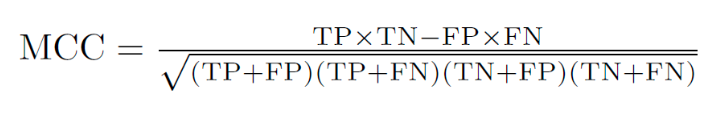


In [38]:
y_pred = log_pipe.predict(X_test)

from sklearn.metrics import matthews_corrcoef

matt_log_van = matthews_corrcoef(y_test, y_pred)
matt_log_van

0.7244431945263918

* MCC skoru da dusuktur. 

### Cohen's Kappa Score

1960 yilinda gelistirilen **Cohen'in Kappa Skoru**, iki değerlendirici (gerçek dünyadaki bir gözlemci ve sınıflandırma modeli) arasındaki mükemmel uyumu ve tesadüfi uyumu değerlendirmeye dayalı **makine öğrenimi sınıflandırma modellerinin performansını ölçmek** için kullanılan bir metrik olarak tanımlanabilir.

Skor 1'e yaklastikca modelin daha basarili ioldugu soylenebilir. 

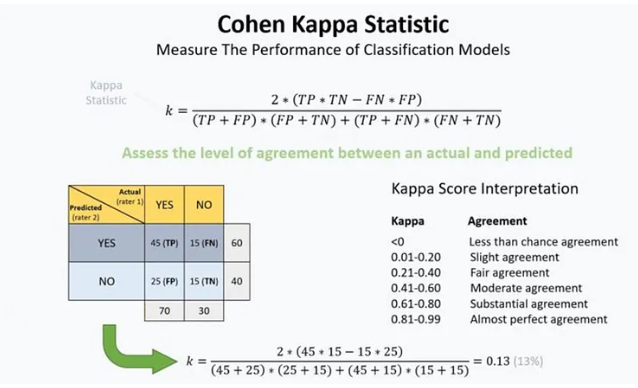


https://bootcamp.uxdesign.cc/cohens-kappa-score-33a0710b2fe0


In [39]:
from sklearn.metrics import cohen_kappa_score

y_pred = log_pipe.predict(X_test)

# Cohen's Kappa skorunu hesapla
kappa_score = cohen_kappa_score(y_test, y_pred)


print("Cohen's Kappa Skoru:", kappa_score)

Cohen's Kappa Skoru: 0.7169387564253706


* Cohen's Kappa Skoru da dusuk cikmistir. 

### Logistic Model RandomizedSearchCV

Skorlari daha hizli alabilmek icin GridSearch yerine RandomSearch kullandik, CV = 10 yerine  5 aldik.

In [88]:
# f1_Hispanic = make_scorer(f1_score, average=None, labels=[2])  # labels=[0]  hispanicleri secmek icin. En kotusu (dusuk olani) Hispanic lere ait sorlar old icin Hisoanicere ait f1 i optimize ettirmek istiyoruz. 


from sklearn.model_selection import RandomizedSearchCV
operations = [("scaler",StandardScaler()),("logistic", LogisticRegression(max_iter=1000, class_weight="balanced"))]

log_pipe = Pipeline(steps=operations)

distributions = {
    "logistic__C": np.logspace(-1, 5, 20),
    "logistic__penalty": ['l2', 'l1'],
    "logistic__solver": ["liblinear"]
}
# Pipline ile calisacaksak kelimelerin basina modeli yazip, 2 tane alt tire koyuyoruz; logistic__ seklinde.
# Create the RandomizedSearchCV model
grid_model = RandomizedSearchCV(log_pipe, distributions, scoring="accuracy", cv=5)
grid_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logistic',
                                              LogisticRegression(class_weight='balanced',
                                                                 max_iter=1000))]),
                   param_distributions={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                        'logistic__penalty': ['l2', 'l1'],
                                        'logistic__solver': ['liblinear']},
                   scoring='accuracy')

In [98]:
grid_model.best_params_

{'logistic__solver': 'liblinear',
 'logistic__penalty': 'l1',
 'logistic__C': 0.1}

In [94]:
grid_model.best_score_

0.8671722643553629

In [91]:
eval_metric(grid_model,X_train, y_train, X_test, y_test)

Test_Set
[[678  19  36]
 [ 19 255   8]
 [ 62  15  62]]
              precision    recall  f1-score   support

           1       0.89      0.92      0.91       733
           2       0.88      0.90      0.89       282
           3       0.58      0.45      0.51       139

    accuracy                           0.86      1154
   macro avg       0.79      0.76      0.77      1154
weighted avg       0.85      0.86      0.86      1154


Train_Set
[[2839   60  160]
 [  42  945   29]
 [ 201   65  274]]
              precision    recall  f1-score   support

           1       0.92      0.93      0.92      3059
           2       0.88      0.93      0.91      1016
           3       0.59      0.51      0.55       540

    accuracy                           0.88      4615
   macro avg       0.80      0.79      0.79      4615
weighted avg       0.87      0.88      0.88      4615



**YORUM** RandomizedSearch yontemiyle elde edien optimal hyper parametrelerle yapilan tahmin sonuclarina gore Logistic Regression modeli askerleri irklarina gore ayirmada  tam basarili olamamistir.  

f1 skoru 0.41'den 0.50'ye yukselmistir ama hala cok dusuktur. 


#### Matthews Correlation Coefficient

In [95]:
y_pred = grid_model.predict(X_test)

from sklearn.metrics import matthews_corrcoef
matt_log_grid = matthews_corrcoef(y_test, y_pred)
matt_log_grid

0.7310400523451352

#### Cohen's Kappa Score

In [96]:
y_pred = grid_model.predict(X_test)

kappa_score = cohen_kappa_score(y_test, y_pred)
kappa_score

0.7298247628976186

### ROC & AUC 

In [276]:
from yellowbrick.classifier import PrecisionRecallCurve

#operations = ["log", LogisticRegression(class_weight='balanced',max_iter=10000, C=10)]
#model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(grid_model, per_class=True, classes= [0, 1, 2], cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();


KeyboardInterrupt: 

### Precision & Recall ???

In [228]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])
param_grid = {"log__C": [1, 5, 10,15,20], 'log__penalty': ["l1", "l2"], 'log__solver': ['liblinear', 'lbfgs']}

In [229]:
operations = ["log", LogisticRegression(class_weight='balanced', max_iter=10000)]
model = Pipeline(steps=operations)
log_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring=recall_Hispanic, n_jobs=-1, cv=5)
log_model_grid.fit(X_train,y_train)

TypeError: 'LogisticRegression' object is not subscriptable

In [ ]:
viz = PrecisionRecallCurve(grid_model, per_class=True, classes= [1, 2, 0], cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

##  SVC

### Vanilla SVC model 

Vanilla modellerde default degerler verilmeli ama dengesiz bir datasetimiz oldugu icin  class_weight düşünülmeli.

Pipline ile modeli olusturduk.

In [101]:
operations = [("scaler",StandardScaler()),("svc", SVC(class_weight="balanced"))]

svc_pipe = Pipeline(steps=operations)

svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced'))])

In [102]:
eval_metric(svc_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[620  17  96]
 [ 11 253  18]
 [ 47  13  79]]
              precision    recall  f1-score   support

           1       0.91      0.85      0.88       733
           2       0.89      0.90      0.90       282
           3       0.41      0.57      0.48       139

    accuracy                           0.82      1154
   macro avg       0.74      0.77      0.75      1154
weighted avg       0.85      0.82      0.83      1154


Train_Set
[[2649   46  364]
 [  20  970   26]
 [  61   24  455]]
              precision    recall  f1-score   support

           1       0.97      0.87      0.92      3059
           2       0.93      0.95      0.94      1016
           3       0.54      0.84      0.66       540

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



* SVC yontemiyle yapi;lan siniflandirma da White ve Black askerlerde yuksek (0.88, 0.90 f1 skoru) basartiya sahip iken Hispaniclerde f1 0.48'dir. 

### Matthews Correlation Coefficient

In [104]:
y_pred = svc_pipe.predict(X_test)

matt_svm_van = matthews_corrcoef(y_test, y_pred)
matt_svm_van 

0.6831978015574891

### Cohen's Kappa Score

In [290]:
y_pred = svc_pipe.predict(X_test)

kappa_score = cohen_kappa_score(y_test, y_pred)
kappa_score

0.6798446386461368

* SVC modelinin genel performansi cok yuksek degildir. 

###  SVC Model RandomizedSearchCV

In [107]:
# f1_Hispanic = make_scorer(f1_score, average=None, labels=[0])

param_dist = {
              'SVC__C': np.linspace(1, 1.3, 10),
              'SVC__gamma': ["scale", "auto"]
              }
 
model = Pipeline([
                ("scaler", StandardScaler()),
                ("SVC", SVC(probability=True))
                ])

svm_model_random = RandomizedSearchCV(model,
                                      param_dist,
                                      n_iter=10,  # Number of random combinations to try
                                      scoring="accuracy",
                                      n_jobs=-1,
                                      cv=5,
                                      verbose=1
                                      )

svm_model_random.fit(X_train, y_train)  # Hizli calissin diye Random Search kullaniyoruz.

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('SVC', SVC(probability=True))]),
                   n_jobs=-1,
                   param_distributions={'SVC__C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                                        'SVC__gamma': ['scale', 'auto']},
                   scoring='accuracy', verbose=1)

In [108]:
svm_model_random.best_params_

{'SVC__gamma': 'auto', 'SVC__C': 1.2666666666666666}

In [109]:
svm_model_random.best_score_

0.866738894907909

In [110]:
eval_metric(svm_model_random, X_train, y_train, X_test, y_test)

Test_Set
[[719   8   6]
 [ 31 248   3]
 [ 94  11  34]]
              precision    recall  f1-score   support

           1       0.85      0.98      0.91       733
           2       0.93      0.88      0.90       282
           3       0.79      0.24      0.37       139

    accuracy                           0.87      1154
   macro avg       0.86      0.70      0.73      1154
weighted avg       0.86      0.87      0.84      1154


Train_Set
[[3030   14   15]
 [  51  963    2]
 [ 317   40  183]]
              precision    recall  f1-score   support

           1       0.89      0.99      0.94      3059
           2       0.95      0.95      0.95      1016
           3       0.92      0.34      0.49       540

    accuracy                           0.90      4615
   macro avg       0.92      0.76      0.79      4615
weighted avg       0.91      0.90      0.89      4615



#### Matthews Correlation Coefficient

In [112]:
y_pred = svm_model_random.predict(X_test)

matt_svm_random = matthews_corrcoef(y_test, y_pred)
matt_svm_random

0.7385248556239744

#### Cohen's Kappa Score

In [297]:
y_pred = svc_pipe.predict(X_test)

kappa_score = cohen_kappa_score(y_test, y_pred)
kappa_score

0.6798446386461368

**YORUM:** SVM modeli de askerleri irklarina gore tam basariyla siniflandirmayi basaramamistir. 

### Result's Visulation

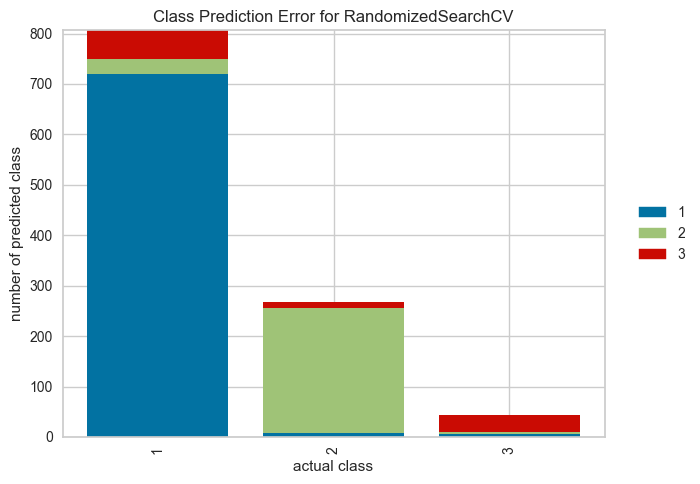

In [298]:
visualizer = ClassPredictionError(svm_model_random)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

* Model az sayida Black askeri ve cok sayida Hispaic askeri White olarak siniflandirirken, Hispaniclerin bir kismini da Black kategorisine atmistir. Az sayida White ve Black askeri ise Hispanic olarak siniflandirmistir. 

## Random Forest

### Vanilla RF Model

In [117]:
y_train.shape

(4615,)

In [119]:
operations = [ ("RF", RandomForestClassifier(class_weight="balanced", random_state=42))]  # ("scaler",StandardScaler()) parantez icinde bu da vardi tree basedlerde scaling sart olmadigi cin bunu cikardik

rf_pipe = Pipeline(steps=operations)
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('RF',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [120]:
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[726   7   0]
 [ 92 190   0]
 [125   7   7]]
              precision    recall  f1-score   support

           1       0.77      0.99      0.87       733
           2       0.93      0.67      0.78       282
           3       1.00      0.05      0.10       139

    accuracy                           0.80      1154
   macro avg       0.90      0.57      0.58      1154
weighted avg       0.84      0.80      0.75      1154


Train_Set
[[3059    0    0]
 [   0 1016    0]
 [   0    0  540]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3059
           2       1.00      1.00      1.00      1016
           3       1.00      1.00      1.00       540

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



#### CV

In [116]:
#model = LogisticRegression(class_weight="balanced") #  class_weight="balanced"  DATAYI BALANCED YAPMAK ICIN. bURAYA ALIYORSAK YUKATIYA DA ALMAK DAHA DOGRU.

scores = cross_validate(rf_pipe, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.817986
test_precision_weighted    0.789329
test_recall_weighted       0.817986
test_f1_weighted           0.773794
dtype: float64

** Bu sonuclar White ve Black askerler icin overfit olmadigini gosterse de Hispanicler icin bunu soylemek cok olasi degildir. 

#### Matthews Correlation Coefficient

In [122]:
y_pred = rf_pipe.predict(X_test)

matt_rf_van = matthews_corrcoef(y_test, y_pred)
matt_rf_van

0.5973830194450902

#### Cohen's Kappa Score

In [304]:
y_pred = svc_pipe.predict(X_test)

kappa_score = cohen_kappa_score(y_test, y_pred)
kappa_score

0.6798446386461368

**YORUM:** RF modelde test datasina ait sonuclar cok iyi iken test datasinda model patlamistir. Matthews korelasyon katsayisi 0.61, Kappa katsayisi 0.67 cikmis olup, modelin basarisi dusuktur.  

 #### RF Model Feature Importance

In [307]:
model = RandomForestClassifier(random_state=101).fit(X_train,y_train)
rf_feature_imp = pd.DataFrame(index = X.columns, data = model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
remainder__sittingheight,0.043510
remainder__eyeheightsitting,0.039039
remainder__heelbreadth,0.037683
remainder__interpupillarybreadth,0.034431
remainder__elbowrestheight,0.033573
remainder__bicristalbreadth,0.032037
remainder__bitragionchinarc,0.022361
remainder__radialestylionlength,0.020060
remainder__forearmhandlength,0.019293
remainder__wristheight,0.017221


* RF de en onemli feature'nin "sittingheight" oldugu gorulmektedir. 

### RF Model RandomizedSearchCV

In [47]:
#f1_Hispanic =  make_scorer(f1_score, average=None, labels=[3] )
from sklearn.model_selection import RandomizedSearchCV

operations = [("RF", RandomForestClassifier(random_state=42))]

rf_pipe = Pipeline(steps=operations)

param_dist = {'RF__n_estimators':[50, 64, 128],    
             'RF__max_features':[2, 3, 4, "sqrt", "log2"],
             'RF__max_depth':[3, 5, 7, 9],
             'RF__min_samples_split':[2, 3, 5]}

grid_model = RandomizedSearchCV(rf_pipe, 
                          param_dist, 
                          scoring = "accuracy", # f1_Hispanic,
                          n_jobs=-1,
                          verbose=False)

grid_model.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('RF',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'RF__max_depth': [3, 5, 7, 9],
                                        'RF__max_features': [2, 3, 4, 'sqrt',
                                                             'log2'],
                                        'RF__min_samples_split': [2, 3, 5],
                                        'RF__n_estimators': [50, 64, 128]},
                   scoring='accuracy', verbose=False)

In [48]:
grid_model.best_params_

{'RF__n_estimators': 64,
 'RF__min_samples_split': 5,
 'RF__max_features': 'sqrt',
 'RF__max_depth': 9}

In [49]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[722   9   2]
 [ 86 193   3]
 [128  10   1]]
              precision    recall  f1-score   support

           1       0.77      0.98      0.87       733
           2       0.91      0.68      0.78       282
           3       0.17      0.01      0.01       139

    accuracy                           0.79      1154
   macro avg       0.62      0.56      0.55      1154
weighted avg       0.73      0.79      0.74      1154


Train_Set
[[3058    1    0]
 [ 125  891    0]
 [ 395   13  132]]
              precision    recall  f1-score   support

           1       0.85      1.00      0.92      3059
           2       0.98      0.88      0.93      1016
           3       1.00      0.24      0.39       540

    accuracy                           0.88      4615
   macro avg       0.95      0.71      0.75      4615
weighted avg       0.90      0.88      0.86      4615



** Model White ve Black askerleri iyi ayirirken, Hispaniclerde cok kotu bir performans sergilemistir.



### Matthews Correlation Coefficient

In [50]:
y_pred = grid_model.predict(X_test)
matt_rf_grid = matthews_corrcoef(y_test, y_pred)
matt_rf_grid

0.5807084578127448

### Cohen's Kappa Score

In [51]:
y_pred = grid_model.predict(X_test)

kappa_score = cohen_kappa_score(y_test, y_pred)
kappa_score

0.530517427052529

** Bu skorlar da oldukca dusuktur. Modelin genel basarisi kotudur.

## 4. XGBoost

### Vanilla XGBoost Model

In [52]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# LabelEncoder ile y değerlerini tekrar kodlama. #Labeli objecte cevirdi tekrar, yoksa hata veriyor. Bunu yapmak sart olmamali, bir daha bakkk
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

operations = [("XGB", XGBClassifier(random_state=42))]

xgb_pipe = Pipeline(steps=operations)

xgb_pipe.fit(X_train, y_train_encoded)

# Later, after predictions, you can convert the predicted numeric labels back to their original categorical form using le.inverse_transform()

Pipeline(steps=[('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [53]:
eval_metric(xgb_pipe, X_train, y_train_encoded, X_test, y_test_encoded)

Test_Set
[[708  17   8]
 [ 38 238   6]
 [103  12  24]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       733
           1       0.89      0.84      0.87       282
           2       0.63      0.17      0.27       139

    accuracy                           0.84      1154
   macro avg       0.79      0.66      0.68      1154
weighted avg       0.82      0.84      0.81      1154


Train_Set
[[3059    0    0]
 [   0 1016    0]
 [   0    0  540]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3059
           1       1.00      1.00      1.00      1016
           2       1.00      1.00      1.00       540

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



* Hispanic'lere ait f1 skor birazcik iyilesti. Ama train ve test datalarina ait sonuclar uyumlu degil. Overfit olup olmadigini gorebilmek icin CV yapalim.

#### CV

In [327]:
# model = LogisticRegression(class_weight="balanced") #  class_weight="balanced"  DATAYI BALANCED YAPMAK ICIN. bURAYA ALIYORSAK YUKATIYA DA ALMAK DAHA DOGRU.

# xgb_pipe.fit(X_train, y_train_encoded)
    
scores = cross_validate(xgb_pipe, X_train, y_train_encoded, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.849404
test_precision_weighted    0.829028
test_recall_weighted       0.849404
test_f1_weighted           0.825240
dtype: float64

** CV sonucu elde edilen skorlar test datasina ait skorlsra yaklastigi icin overfit yoktur. 

#### Matthews Correlation Coefficient

In [54]:
y_pred = xgb_pipe.predict(X_test)

matt_xgb_van = matthews_corrcoef(y_test, y_pred)
matt_xgb_van

-0.29400600366104446

#### Cohen's Kappa Score

In [55]:
y_pred = xgb_pipe.predict(X_test)

kappa_score = cohen_kappa_score(y_test, y_pred)
kappa_score

-0.15985671236455712

* Sonuclar battiii

### XGBoost Model GridsearchCV

In [75]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

f1_Hispanic = make_scorer(f1_score, average=None, labels=[0])

# Define the parameter distributions
param_dist = {
    "n_estimators": [50, 64, 100, 128, 300],
    'max_depth': [2, 3, 4, 7, 9], 
    "learning_rate": [0.1, 0.2, 0.3],
    "subsample": [0.2, 0.3, 0.5],
    "colsample_bytree": [0.3, 0.5, 0.7]
}

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Create an XGBoost classifier instance
xgb_model = XGBClassifier(random_state=101)

# Create RandomizedSearchCV instance
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring=f1_Hispanic,
    verbose=False,
    cv=5,  # Cross-validation folds
    n_iter=50,  # Number of parameter settings that are sampled
    n_jobs=-1
)

# Fit the RandomizedSearchCV instance to the data
xgb_random_search.fit(X_train, y_train_encoded)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=101, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [2, 3, 4, 7, 9],
                                        'n_estimators': [50, 64, 100, 128, 300],
                                        'subsample': [0.2, 0.3, 0.5]},
                   scoring=make_scorer(f1_score, average=None, labels=[0]),
                   verbose=False)

In [77]:
xgb_random_search .best_params_

{'subsample': 0.5,
 'n_estimators': 300,
 'max_depth': 3,
 'learning_rate': 0.2,
 'colsample_bytree': 0.5}

In [78]:
eval_metric(xgb_random_search , X_train, y_train_encoded, X_test, y_test_encoded)

Test_Set
[[701  13  19]
 [ 31 242   9]
 [ 85  12  42]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       733
           1       0.91      0.86      0.88       282
           2       0.60      0.30      0.40       139

    accuracy                           0.85      1154
   macro avg       0.79      0.71      0.73      1154
weighted avg       0.84      0.85      0.84      1154


Train_Set
[[3059    0    0]
 [   2 1014    0]
 [  20    0  520]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3059
           1       1.00      1.00      1.00      1016
           2       1.00      0.96      0.98       540

    accuracy                           1.00      4615
   macro avg       1.00      0.99      0.99      4615
weighted avg       1.00      1.00      1.00      4615



In [79]:
xgb_random_search.best_score_

0.9129725336111928

** BURAYI tekrar calistir

#### Matthews Correlation Coefficient

In [83]:
y_pred = xgb_random_search.predict(X_test)

matt_xgb_grid = matthews_corrcoef(y_test, y_pred)
matt_xgb_grid

-0.2971807788708596

#### Cohen's Kappa Score

In [81]:
y_pred = xgb_random_search.predict(X_test)

kappa_score = cohen_kappa_score(y_test, y_pred)
kappa_score

-0.17026691690593188

**YORUM:** XGBoost sonuclari kotu.

# Comparing Models

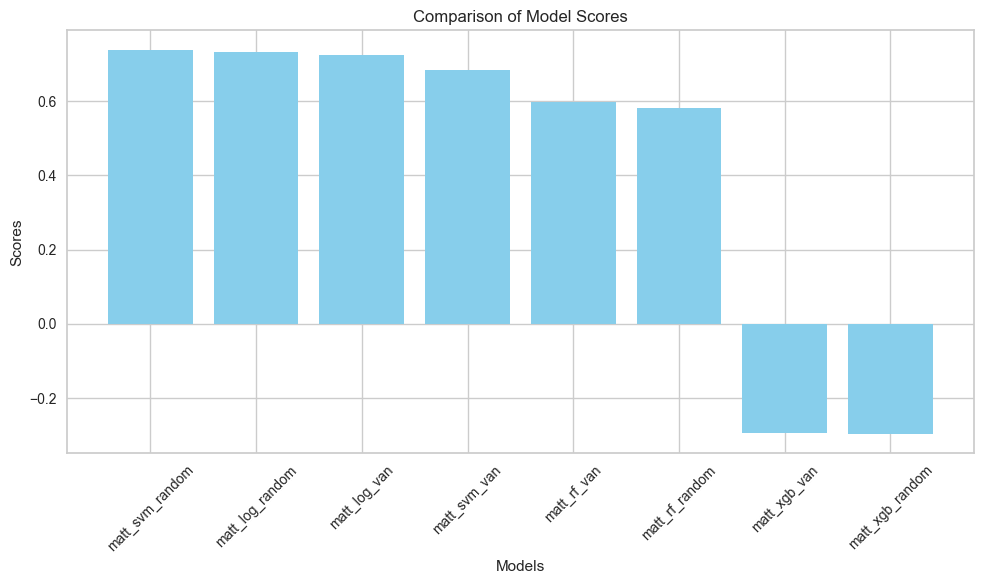

In [123]:
scores = [matt_log_van, matt_log_grid, 
          matt_svm_van, matt_svm_random, 
          matt_rf_van, matt_rf_grid, 
          matt_xgb_van, matt_xgb_grid]

# Labels for the models
model_labels = ['matt_log_van', 'matt_log_random', 
                'matt_svm_van', 'matt_svm_random',   
                "matt_rf_van", "matt_rf_random", 
                "matt_xgb_van", "matt_xgb_random"]

# Create pairs of scores and labels, and sort based on scores
sorted_scores_labels = sorted(zip(scores, model_labels), reverse=True)

# Unpack sorted pairs back into separate lists
sorted_scores, sorted_labels = zip(*sorted_scores_labels)

plt.figure(figsize=(10, 6))
plt.bar(sorted_labels, sorted_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Scores')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**YORUM:** Bu grafige gore en basarili modeller SVM ve Logistic Regression modelleridir. Bu modelleri kendi icinde Hispanic'lerin f1 skoru yonunden degerlendirdigimizde **Logistic regresyon modelinin daha basarili** oldugu gorulmustur. Bu nedenle  FINAL MODEL Logistic Regression Modeli ile kurulacaktir.

# FINAL MODEL

Final Model tum data seti (X degereri) kullanilarak tahmin edilecektir. 

Onceden disa aktardigimiz df i geri cagiralim ve X i geri alalim. 

Bunun icin once X serilerinin "column_trans" fonksiyonu (Bunu daha once yukarida tanimladik, kullandik) encoding islemine tabi tutulmasi gerekmektedir.

In [140]:
# Data setini yeniden cagiralim; 
df = pd.read_csv("clean.csv")

In [141]:
# Labelleme yapalim;
X = df.drop(columns="DODRace")
y = df.DODRace

In [143]:
# X'e Encoding uygulayalim;
X_trans = column_trans.transform(X)

In [144]:
X = pd.DataFrame(X_trans, columns=features, index=X.index)
X.head()

,onehotencoder__Gender_Male,onehotencoder__Component_Army Reserve,onehotencoder__Component_Regular Army,onehotencoder__Branch_Combat Service Support,onehotencoder__Branch_Combat Support,remainder__abdominalextensiondepthsitting,remainder__acromialheight,remainder__acromionradialelength,remainder__anklecircumference,remainder__axillaheight,remainder__balloffootcircumference,remainder__balloffootlength,remainder__biacromialbreadth,remainder__bicepscircumferenceflexed,remainder__bicristalbreadth,remainder__bideltoidbreadth,remainder__bimalleolarbreadth,remainder__bitragionchinarc,remainder__bitragionsubmandibulararc,remainder__bizygomaticbreadth,remainder__buttockcircumference,remainder__buttockdepth,remainder__buttockheight,remainder__buttockkneelength,remainder__buttockpopliteallength,remainder__calfcircumference,remainder__cervicaleheight,remainder__chestbreadth,remainder__chestcircumference,remainder__chestdepth,remainder__chestheight,remainder__crotchheight,remainder__crotchlengthomphalion,remainder__crotchlengthposterioromphalion,remainder__earbreadth,remainder__earlength,remainder__earprotrusion,remainder__elbowrestheight,remainder__eyeheightsitting,remainder__footbreadthhorizontal,remainder__footlength,remainder__forearmcenterofgriplength,remainder__forearmcircumferenceflexed,remainder__forearmforearmbreadth,remainder__forearmhandlength,remainder__functionalleglength,remainder__handbreadth,remainder__handcircumference,remainder__handlength,remainder__headbreadth,remainder__headcircumference,remainder__headlength,remainder__heelanklecircumference,remainder__heelbreadth,remainder__hipbreadth,remainder__hipbreadthsitting,remainder__iliocristaleheight,remainder__interpupillarybreadth,remainder__interscyei,remainder__interscyeii,remainder__kneeheightmidpatella,remainder__kneeheightsitting,remainder__lateralfemoralepicondyleheight,remainder__lateralmalleolusheight,remainder__lowerthighcircumference,remainder__mentonsellionlength,remainder__neckcircumference,remainder__neckcircumferencebase,remainder__overheadfingertipreachsitting,remainder__palmlength,remainder__poplitealheight,remainder__radialestylionlength,remainder__shouldercircumference,remainder__shoulderelbowlength,remainder__shoulderlength,remainder__sittingheight,remainder__sleevelengthspinewrist,remainder__sleeveoutseam,remainder__span,remainder__stature,remainder__suprasternaleheight,remainder__tenthribheight,remainder__thighcircumference,remainder__thighclearance,remainder__thumbtipreach,remainder__tibialheight,remainder__tragiontopofhead,remainder__trochanterionheight,remainder__verticaltrunkcircumferenceusa,remainder__waistbacklength,remainder__waistbreadth,remainder__waistcircumference,remainder__waistdepth,remainder__waistfrontlengthsitting,remainder__waistheightomphalion,remainder__weightkg,remainder__wristcircumference,remainder__wristheight,remainder__Age
0,1.0,0.0,1.0,0.0,0.0,266.0,1467.0,337.0,222.0,1347.0,253.0,202.0,401.0,369.0,274.0,493.0,71.0,319.0,291.0,142.0,979.0,240.0,882.0,619.0,509.0,373.0,1535.0,291.0,1074.0,259.0,1292.0,877.0,607.0,351.0,36.0,71.0,19.0,247.0,802.0,101.0,273.0,349.0,299.0,575.0,477.0,1136.0,90.0,214.0,193.0,150.0,583.0,206.0,326.0,70.0,332.0,366.0,1071.0,685.0,422.0,441.0,502.0,560.0,500.0,77.0,391.0,118.0,400.0,436.0,1447.0,113.0,437.0,273.0,1151.0,368.0,145.0,928.0,883.0,600.0,1782.0,1776.0,1449.0,1092.0,610.0,164.0,786.0,491.0,140.0,919.0,1700.0,501.0,329.0,933.0,240.0,440.0,1054.0,81.5,175.0,853.0,41.0
1,1.0,0.0,1.0,0.0,1.0,233.0,1395.0,326.0,220.0,1293.0,245.0,193.0,394.0,338.0,257.0,479.0,67.0,344.0,320.0,135.0,944.0,232.0,870.0,584.0,468.0,357.0,1471.0,269.0,1021.0,253.0,1244.0,851.0,615.0,376.0,33.0,62.0,18.0,232.0,781.0,98.0,263.0,348.0,289.0,523.0,476.0,1096.0,86.0,203.0,195.0,146.0,568.0,201.0,334.0,72.0,312.0,356.0,1046.0,620.0,441.0,447.0,490.0,540.0,488.0,73.0,371.0,131.0,380.0,420.0,1380.0,118.0,417.0,254.0,1119.0,353.0,141.0,884.0,868.0,564.0,1745.0,1702.0,1387.0,1076.0,572.0,169.0,822.0,476.0,120.0,918.0,1627.0,4

In [145]:
# Logistic Regression Modelini RandomSearch altinda yapalim; 

f1_Hispanic = make_scorer(f1_score, average=None, labels=[0])

operations = [("scaler",StandardScaler()),("logistic", LogisticRegression(max_iter=10000, class_weight="balanced"))]

log_pipe = Pipeline(steps=operations)

distributions = {
    "logistic__C": np.logspace(-1, 5, 20),
    "logistic__penalty": ['l1'],
    "logistic__solver": ["liblinear"],
}

# Create the RandomizedSearchCV model
grid_model = RandomizedSearchCV(log_pipe, distributions, scoring=f1_Hispanic, cv=5)
grid_model.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logistic',
                                              LogisticRegression(class_weight='balanced',
                                                                 max_iter=10000))]),
                   param_distributions={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                        'logistic__penalty': ['l1'],
                                        'logistic__solver': ['liblinear']},
                   scoring=make_scorer(f1_score, average=None, labels=[0]))

In [148]:
# Best hyper parametreleri gorelim;
grid_model.best_params_

{'logistic__solver': 'liblinear',
 'logistic__penalty': 'l1',
 'logistic__C': 0.42813323987193935}

In [149]:
# Modelin tahmin sonuclarini alalim; 
y_pred = grid_model.predict(X)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[3487   71  234]
 [  59 1211   28]
 [ 236   76  367]]
              precision    recall  f1-score   support

           1       0.92      0.92      0.92      3792
           2       0.89      0.93      0.91      1298
           3       0.58      0.54      0.56       679

    accuracy                           0.88      5769
   macro avg       0.80      0.80      0.80      5769
weighted avg       0.88      0.88      0.88      5769



## Matthews Correlation Coefficient

In [150]:
y_pred = grid_model.predict(X)
matt_log_van = matthews_corrcoef(y, y_pred)
matt_log_van

0.757673630364096

**YORUM:** Su ana kadar elde edebildigimiz en basarili sonuclar bunlar. 

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Yukaridaki makale Smote islemini detayli bir sekilde anlatiyor. 

##  Smote implement

__Smote__ -----> Dengesiz data setlerinde datadaki en buyuk gozlem sayisi hangi class' a ait ise diger class' larin gozlem sayisini da ona esitler. Mesela datamizdaki en buyuk gozlem sayisi White = 3034 idi. Smote islemi uygulandiginda diger class' lardaki gozlem sayilari da buna esitlenir. Dengesiz datasetlerinde mutlaka denenmelidir:

Smote islemi uc turlu yapilabilmektedir:

**1) SMOTE with Oversampling:**  Az olan gozlem sayisi, mevcut gozlemlerden randomly secip ustune ekleyerek, (artirarak), cok olana esitlenir. 

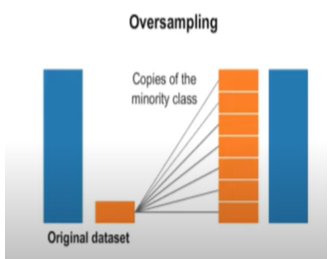


**2) SMOTE with Undersampling:**  Cok olan gozlem sayisi aralarindan randomly silme islemi yaparak (azaltarak), az olana esitlenir.  

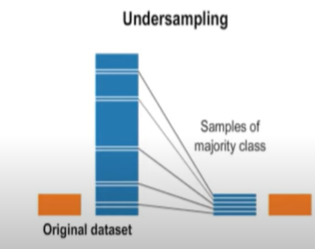


**3) Over/Under Sampling:** Cok olan gozlem sayisi aralarindan randomly silme islemi yaparak (azaltarak), az olan gozlem sayisi, mevcut gozlemlerden randomly secilipp ustune eklenerek ortadaki gozlem sayisina esitlenir. 

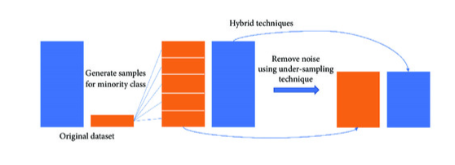



## Logistic Regression Then Over/Under Sampling

In [151]:
y_train.value_counts()

1    3059
2    1016
3     540
Name: DODRace, dtype: int64

* Target variablede yer alan kategorik degiskenler farkli sayilarda oldugu icin veri seti unbalance idi.
* Bunu balance hale getirerek calisalim. 
* Bunun icin SMOTE yontemini kullanalim.

### SMOTE with Oversampling and Logistic Regression


Orneklemi genisletirken  ---> **SMOTE** kullanmak yeterli     --- over1 = SMOTE(sampling_strategy={2:3059})--- ifadesinde

In [153]:
# %pip install imbalanced-learn

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

In [ ]:
"""# Oversample and plot imbalanced dataset with SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where"""

In [154]:
# Elimizde 3059 tane 1, 1016 tane 2, 540 tane 3 var. Bu sayilari birbirine esitlemek icin en fazla olani temel alalim;

over1 = SMOTE(sampling_strategy={2:3059})
X_train_resampled_over, y_train_resampled_over = over1.fit_resample(X_train, y_train)

# Apply oversampling 
over2 = SMOTE(sampling_strategy={3:3059})
X_train_resampled, y_train_resampled = over2.fit_resample(X_train_resampled_over, y_train_resampled_over)

# Define the pipeline steps
steps = [('scaler', StandardScaler()), ("logistic", LogisticRegression())]

# Create the pipeline
log_pipe = Pipeline(steps=steps)

# Fit the pipeline on the resampled training data
log_pipe.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [155]:
y_train_resampled.value_counts()

3    3059
1    3059
2    3059
Name: DODRace, dtype: int64

* Simdi y_traindeki class sayilari esitlendi. Bunlari kullanarak Logistic Regression Modeli RandomSearch yontemiyle  tahmin edelim; 

#### Random Search

In [159]:
f1_Hispanic = make_scorer(f1_score, average=None, labels=[0])

# Define the pipeline step
operations = [("scaler",StandardScaler()),("logistic", LogisticRegression(max_iter=1000))]

log_pipe = Pipeline(steps=operations)

distributions = {
                "logistic__C": np.logspace(-1, 5, 20),
                "logistic__penalty": ['l2', 'l1'],
                "logistic__solver": ["liblinear"]
                 }

# Create the RandomizedSearchCV model
grid_model = RandomizedSearchCV(log_pipe, distributions, scoring=f1_Hispanic, cv=10)
grid_model.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logistic',
                                              LogisticRegression(max_iter=1000))]),
                   param_distributions={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                        'logistic__penalty': ['l2', 'l1'],
                                        'logistic__solver': ['liblinear']},
                   scoring=make_scorer(f1_score, average=None, labels=[0]))

In [160]:
eval_metric(grid_model, X_train_resampled, y_train_resampled, X_test, y_test)

Test_Set
[[604  16 113]
 [ 15 254  13]
 [ 39  14  86]]
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       733
           2       0.89      0.90      0.90       282
           3       0.41      0.62      0.49       139

    accuracy                           0.82      1154
   macro avg       0.74      0.78      0.75      1154
weighted avg       0.85      0.82      0.83      1154


Train_Set
[[2527   64  468]
 [  58 2918   83]
 [ 558  202 2299]]
              precision    recall  f1-score   support

           1       0.80      0.83      0.81      3059
           2       0.92      0.95      0.93      3059
           3       0.81      0.75      0.78      3059

    accuracy                           0.84      9177
   macro avg       0.84      0.84      0.84      9177
weighted avg       0.84      0.84      0.84      9177



**YORUM:** SMOTE Over Sampling islemi ile az olan veriler artirilip, cok olana esitlendiginde, sonuclar az bozuldu. Hispanic'lere ait f1 skoru 0.50'den 0.49'a, accuracy degeri 0.86'dan 0.82'ye geriledi. 

 ### SMOTE with Under Sampling and Logistic Regression
 
 
 Orneklemi daraltacagimiz kisimda  --- > **RandomUnderSampler**  --- kullanilmali

In [164]:
y_train.value_counts()

1    3059
2    1016
3     540
Name: DODRace, dtype: int64

In [174]:
# Elimizde 3059 tane 1, 1016 tane 2, 540 tane 3 var. Bu sayilari birbirine esitlemek icin en az olani temel alalim;

under1 = RandomUnderSampler(sampling_strategy={1:540})
X_train_resampled_under, y_train_resampled_under = under1.fit_resample(X_train, y_train)

under2 = RandomUnderSampler(sampling_strategy={2:540})
X_train_resampled, y_train_resampled = under2.fit_resample(X_train_resampled_under, y_train_resampled_under)

# Define the pipeline steps
steps = [('scaler', StandardScaler()), ("logistic", LogisticRegression())]

# Create the pipeline
log_pipe = Pipeline(steps=steps)

# Fit the pipeline on the resampled training data
log_pipe.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [175]:
y_train_resampled.value_counts()

1    540
2    540
3    540
Name: DODRace, dtype: int64

* Kategorik veriler en az olanda esitlendi. Simdi bunlari kullanarak  LR analizi yapalim. 

#### Random Search

In [177]:
f1_Hispanic = make_scorer(f1_score, average=None, labels=[0])

# Define the pipeline step
operations = [("scaler",StandardScaler()),("logistic", LogisticRegression(max_iter=1000))]

log_pipe = Pipeline(steps=operations)

distributions = {
                "logistic__C": np.logspace(-1, 5, 20),
                "logistic__penalty": ['l2', 'l1'],
                "logistic__solver": ["liblinear"]
                 }

# Create the RandomizedSearchCV model
grid_model = RandomizedSearchCV(log_pipe, distributions, scoring=f1_Hispanic, cv=10)
grid_model.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logistic',
                                              LogisticRegression(max_iter=1000))]),
                   param_distributions={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                        'logistic__penalty': ['l2', 'l1'],
                                        'logistic__solver': ['liblinear']},
                   scoring=make_scorer(f1_score, average=None, labels=[0]))

In [178]:
eval_metric(grid_model, X_train_resampled, y_train_resampled, X_test, y_test)

Test_Set
[[586  19 128]
 [ 13 250  19]
 [ 42  14  83]]
              precision    recall  f1-score   support

           1       0.91      0.80      0.85       733
           2       0.88      0.89      0.88       282
           3       0.36      0.60      0.45       139

    accuracy                           0.80      1154
   macro avg       0.72      0.76      0.73      1154
weighted avg       0.84      0.80      0.81      1154


Train_Set
[[449   8  83]
 [ 10 509  21]
 [109  49 382]]
              precision    recall  f1-score   support

           1       0.79      0.83      0.81       540
           2       0.90      0.94      0.92       540
           3       0.79      0.71      0.74       540

    accuracy                           0.83      1620
   macro avg       0.83      0.83      0.83      1620
weighted avg       0.83      0.83      0.83      1620



**YORUM:** SMOTE Over Sampling islemi ile cok olan veriler azaltilarak en az sayida olanla esitlendiginde, sonuclar daha da bozuldu. Hispanic'lere ait f1 skoru 0.49'dan 0.45'e, accuracy degeri 0.82'den 0.80'e geriledi.

### SMOTE with Under / Over Sampling and Logistic Regression

In [179]:
y_train.value_counts()

1    3059
2    1016
3     540
Name: DODRace, dtype: int64

In [188]:
# Elimizde 3059 tane 1, 1016 tane 2, 540 tane 3 var. Bu sayilari birbirine esitlemek icin ortanca olani temel alalim;

under1 = RandomUnderSampler(sampling_strategy={1:1016})
X_train_resampled_under, y_train_resampled_under = under1.fit_resample(X_train, y_train)

over3 = SMOTE(sampling_strategy={3:1016})
X_train_resampled, y_train_resampled = over3.fit_resample(X_train_resampled_under, y_train_resampled_under)

# Define the pipeline steps
steps = [('scaler', StandardScaler()), ("logistic", LogisticRegression())]

# Create the pipeline
log_pipe = Pipeline(steps=steps)

# Fit the pipeline on the resampled training data
log_pipe.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [189]:
y_train_resampled.value_counts()

1    1016
2    1016
3    1016
Name: DODRace, dtype: int64

#### Random Search

In [190]:
f1_Hispanic = make_scorer(f1_score, average=None, labels=[0])

# Define the pipeline step
operations = [("scaler",StandardScaler()),("logistic", LogisticRegression(max_iter=1000))]

log_pipe = Pipeline(steps=operations)

distributions = {
                "logistic__C": np.logspace(-1, 5, 20),
                "logistic__penalty": ['l2', 'l1'],
                "logistic__solver": ["liblinear"]
                 }

# Create the RandomizedSearchCV model
grid_model = RandomizedSearchCV(log_pipe, distributions, scoring=f1_Hispanic, cv=10)
grid_model.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logistic',
                                              LogisticRegression(max_iter=1000))]),
                   param_distributions={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                        'logistic__penalty': ['l2', 'l1'],
                                        'logistic__solver': ['liblinear']},
                   scoring=make_scorer(f1_score, average=None, labels=[0]))

In [191]:
eval_metric(grid_model, X_train_resampled, y_train_resampled, X_test, y_test)

Test_Set
[[580  21 132]
 [ 11 257  14]
 [ 37  15  87]]
              precision    recall  f1-score   support

           1       0.92      0.79      0.85       733
           2       0.88      0.91      0.89       282
           3       0.37      0.63      0.47       139

    accuracy                           0.80      1154
   macro avg       0.72      0.78      0.74      1154
weighted avg       0.85      0.80      0.82      1154


Train_Set
[[848  23 145]
 [ 24 949  43]
 [177  79 760]]
              precision    recall  f1-score   support

           1       0.81      0.83      0.82      1016
           2       0.90      0.93      0.92      1016
           3       0.80      0.75      0.77      1016

    accuracy                           0.84      3048
   macro avg       0.84      0.84      0.84      3048
weighted avg       0.84      0.84      0.84      3048



**YORUM:** SMOTE Under/Over Sampling islemi ile cok olan veriler azaltilarak, az olan veriler cogaltilarak ortadakine  esitlendiginde, sonuclar under sampling isleminde elde edilenlere gore kismen iyilesde oversampling yapilarak daha cok gozlemle caliusiialn durumdakine gore bozulma vardir. 

Demek ki veri setinin cok olmasi, modelin basarisini artirmaktadir. 

Bu nedenle calislamalarda oversapmling isleminin daha cok tercih edilmeai yararli olacaktir. 

Ancak **SOTE islemi ile elde edilen tum sonuclar, orijinal serilerle elde edilen sonuclardan daha kotudur**. 

O halde bu veri seti icin **SMOTE islemi yapilmasina gerek yoktur**. 


#  SHAP


https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-shapley-values


SHAP ve LIME gibi yontemler, bir makine öğrenimi modelinin anlaşılmasını basitleştiren tekniklerdir. Bunu, modelin karar verme sürecinin belirli bölümlerine odaklanarak, modelin tahminlerine nasıl geldiğini görmeyi kolaylaştırarak yaparlar. 


+ Modelin yorumlanabilirliğini artırmak için önemli bir yaklaşım, belirli bir örnek için bir modelin öngörüsüne her özelliğin katkısını atfetmek için güçlü bir yöntem olan SHAP (SHapley Ekleyici Açıklamalar) kullanımıdır.


+ Lundberg ve Lee tarafından 2017'de tanıtılan SHAP değerleri, kooperatif oyun teorisine dayanmaktadır (bu, bireylerin gruplarının ortak bir hedefe ulaşmak için nasıl birlikte çalışabileceği ile ilgilidir) ve **Nobel ödüllü Lloyd Shapley'in çalışmalarından** ilham almıştır.


+ Shapley değeri hesaplaması, her oyuncunun (veya özelliğinin) tüm potansiyel oyuncu permütasyonlarındaki marjinal katkılarının ortalamasını içerir.


+ Bu, her olası özellik kombinasyonunun değerlendirilmesini ve her bir özelliğin bu kombinasyonlara dahil edildiğinde modelin öngörüsü üzerindeki etkisinin belirlenmesini içerir.


+ Kısacası, SHAP değerleri bir model içindeki her özelliğin önemini tahmin eder. Bu değerler, herhangi bir ML modeli tarafından yapılan tahminleri anlamak için tutarlı ve yorumlanabilir bir yöntem sağlar.



Görselleştirme Teknikleri  arasinda yer alan **t-SNE (t-Distributed Stochastic Neighbor Embedding)** ve **UMAP (Uniform Manifold Approximation and Projection)** gibi araçlar da yüksek boyutlu verilerin görselleştirilmesini kolaylaştırır ve model davranışına ışık tutar.

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-shapley-values




## Shap values for all data

In [193]:
!pip install shap


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 462.3/462.3 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 27.7/27.7 MB 2.5 MB/s eta 0:00:00


Permutation explainer: 4616it [02:49, 26.18it/s]                                                                       


In [196]:
import shap

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)  # Train the model

explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_train)

Permutation explainer: 4616it [02:26, 29.47it/s]                                                                       


### SHAP'i Global Yorumlama

+ Aşağıdaki özet grafiği, bir modeldeki en etkili özelliklerin kapsamlı bir görünümünü sunar.
+ X ekseni Shap skorlarını, Y ekseni özellikleri görüntülerken, grafik ayrıca her özellik için SHAP değerlerinin dağılımını gösterir ve renk, özelliklerin değerini düşükten yüksekliğe doğru temsil eder.
+ Bu, model tahminleri üzerinde en büyük etkiye sahip özelliklerin belirlenmesine yardımcı olur.
+ Her nokta, belirli bir veri noktası için belirli bir özelliğin SHAP değerini gösterir ve en kritik özelliklerin, model çıkışları üzerindeki etkilerinin doğası (pozitif veya negatif) ve katkılarının kapsamının belirlenmesini sağlar.
+ * Yatay konum, bu değerin etkisinin daha yüksek veya daha düşük bir tahminle ilişkili olup olmadığını gösterir.
+ * Renk, bu değişkenin yüksek (kırmızı) veya düşük (mavi) olup olmadığını gösterir.
+ * Span en büyük model üzerinde etkiye sahip özelliktir. Düşük span değerlerinin model üzerindeki etkisi daha fazla olmuştur.

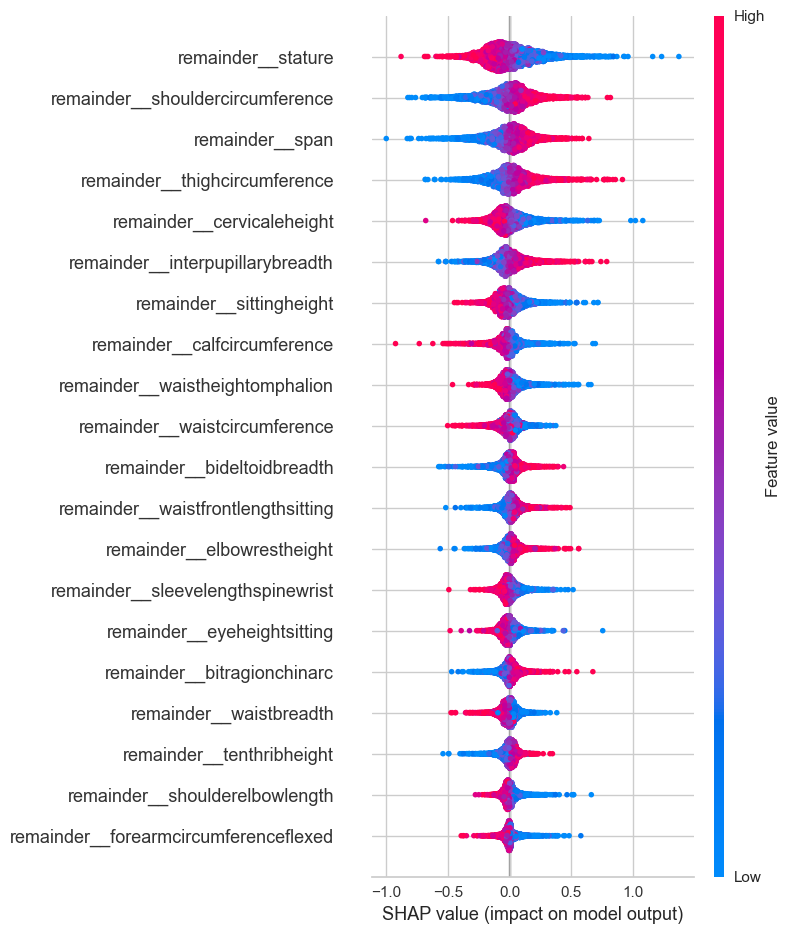

In [197]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

+ SHAP çubuk grafiği, küresel özellik önemini görselleştirmek için alternatif bir yol sunar.
+ Daha yüksek çubuklar, özelliğin model için daha önemli olduğunu gösterir.

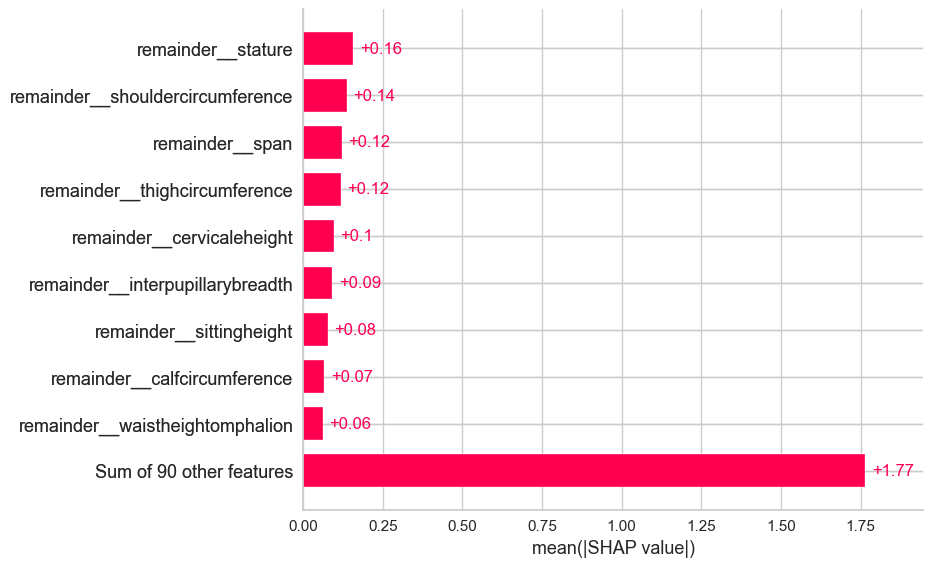

In [198]:
# Etkilerin mutlak degerlerini gosteriyor.

shap.plots.bar(shap_values)

**YORUM:** Etkilerin mutlak degerini giosteren bu grafige gore; askerlerin irkalrini belirlemede en onemli girdi "stature"dir. Bu featurenin etkisi 0.16 iken, diger 90 degiskenin etkileri toplami 1.77'dir. 

### Yerel Yorumlama

Bir Waterfall grafigi olan bu sekil, her bir faktorun hedef degisken uzerindekui etkilerini gostermektedir. 

* Mavi cizgilere hedefe ulasmayi olumsuz etkileyen faktorleri, kirmizi cizgiler ise olumlu faktorleri gostermektedir. 

* 0. gozlem hakkinda bilgi verir. 

* En alttan basla okumaya. Alttan baslayip saga sola giderek en uste cik. En usttki 1 e gitti. Black. 

* Bunun black olarak adlandirilkmasina en so etki eden; en usttki faktor, "span" oldu burada.

* Bankacilik sektorunde cok kullaniliyor bu hgrafik, kredi basvuruloarinin son kararini vermede...



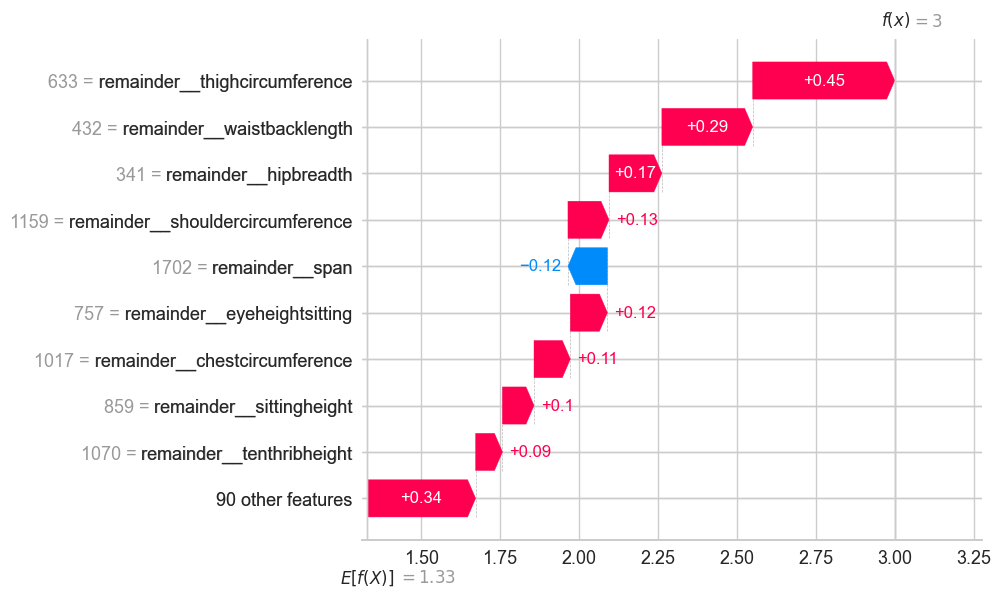

In [200]:
shap.plots.waterfall(shap_values[0]) # 0. indexe sahip kisi hakkinda bilgi uretecek

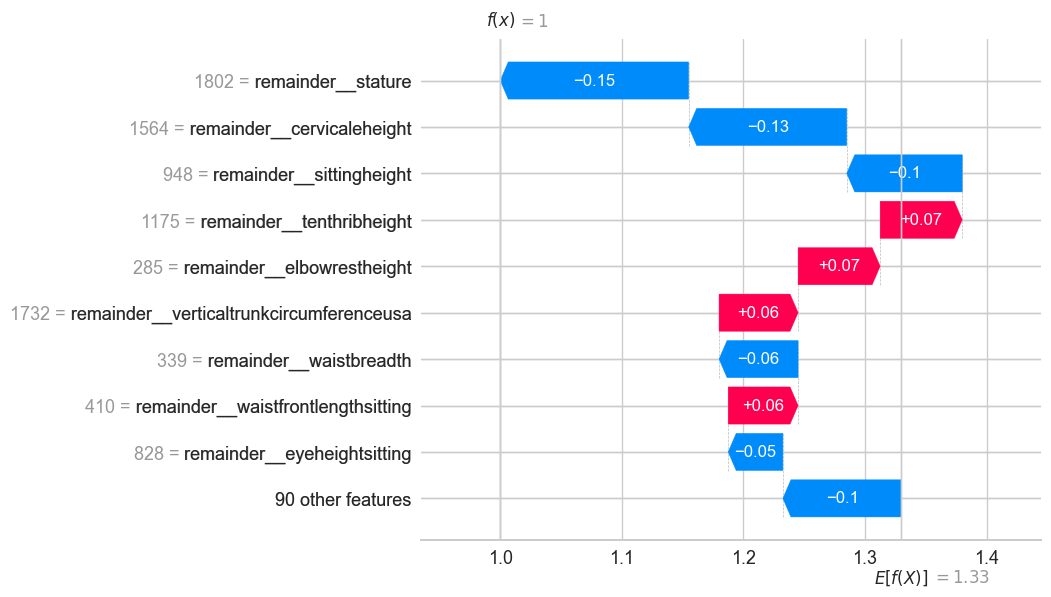

In [201]:
shap.plots.waterfall(shap_values[1]) # 1. indexe sahip kisi hakkinda bilgi uretecek

In [202]:
y_train.value_counts().sum()

4615

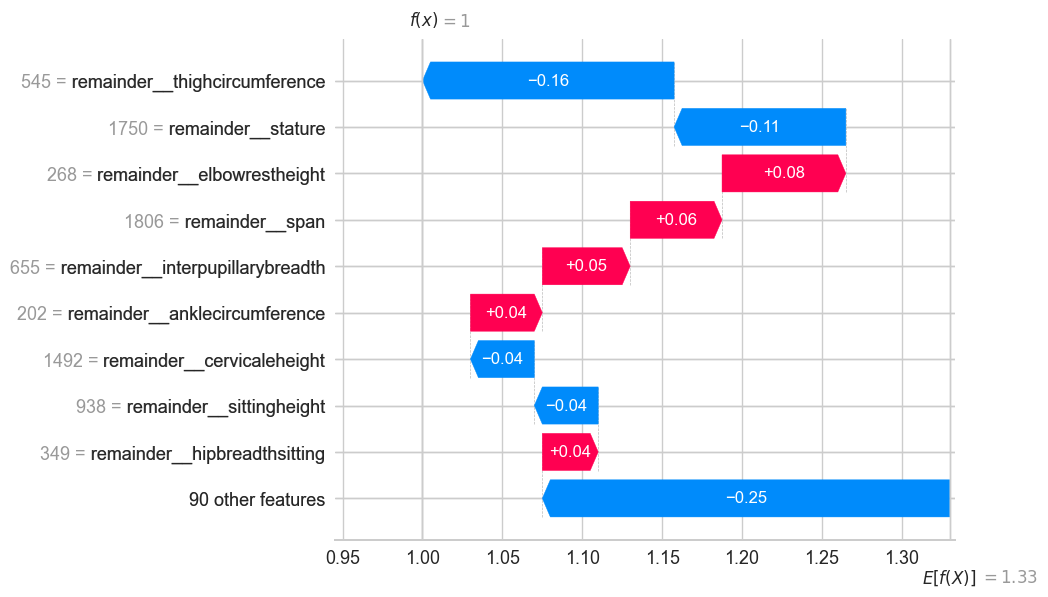

In [203]:
shap.plots.waterfall(shap_values[4614]) # 4614. indexe sahip kisi hakkinda bilgi uretecek

**YORUM:** Eger bu bir kisiye kkredi veriliop verilmeyecegini inceleme grafigi olsaydi, 4614 indeks numarasindaki kisiye kredi verilmesini en fazla negatif etkileyen faktor; "thighcircumference" olacakti.

# CONCLUSSION

Bu calismada ABD'de 2012 yilinda askerlerin antropometrik olcumleri ile elde edilen 6068 askerin vucut olcum verileri kullanilarak, askerlerin irklari tahmin edilmeye calisilmistir. Analize dahil edilen askerlerden 4082'si erkek, 1986'si kadindir. Askerlerin kendi beyanlari ve teknik olcumleri kapsayan 108 sutundan olusan veri setinden, askerlerin beyani ve teknik olcule elde edilen benzer veriler oldugunda askerlerin kendi beyanlari devre disi birakilmistir. Ayrica bir irktan 500'den az sayida asker olan siniflar da analiz disi birakilmistir.  Boiylece geri kalan 5769 satir ve 98 sutunluk veri seti ile analizler gerceklestirilmistir. Son durumda veri setinde 3792 White, 1298 Black ve 679 Hispanic asker kalmistir. Bu yonuyle dengesiz bir veri seti ile calisilmistir. 


OneHotEncoding islemi ile categoricial sutunlar numeric hale getirilmis, Standart Scaling islemi pipline icinde gerceklestirilmistir.  Siniflandirma analizleri; Logistic Regression, SVC, Random Forest ve XGBoost yontemleriyle gerceklestirilmis, en basarili tahmin sonuclarinin Grid Search hyper parametreleri kullanlarak gerceklestirilen Logistic Regression mnodeline it oldugu gorulmusutur. 


Veri set dengesiz oldugu icin odelin genel basarisini "accuracy" skoru ile olcmek mumkun olmamsi, bu amacla  "Matthews Correlation Coefficient" ve "Cohen's Kappa Score" kulalnilmistir. "Matthews Correlation Coefficient" skorlarina gore yapilan siralamada da SVC ile Logistic Regression basabas gelmistir. 

Veri setini dengeli hale getirebilmek icin SMOTE with Oversampling,  SMOTE with Under Sampling  ve  SMOTE with Under / Over Sampling yontemleriyle veri seti sentetik olarak balanced hala getirilmisse de bu durum analizlerde bir iyilsesmeye imkan saglamamistir. 

SHAP yontemiyle yapilan modeli anlama cabalari; askerlerin irklarini belirlemede en fazla pozitif etkiyi "stature" verisinin sagladigi, 0. ve 4614. indexe sahip askerin Hispanic olarak siniflandirilmasinin en onemli nedeninin "thigcircimference" degeri oldugu, 1. indexe sahip askerin White olarak siniflandiriomasinin sebebi ise yine "stature" cikmistir.  

Bu tur calismalarin, askerlerin kiyafet ve diger techizatlarinin uretim ve dagitiminda onemli oldugu bilinen bir gercei olup, askerlerin genetik yapilari ve irksal gecmisleri de zaman icinde yasayabilecekleri  vucut olcu degisimlerinin oncu bir gostergesi olmasi yonuyle, geceklestirilen bu Makine Ogrenmei algoritmasinin asdkerlere ve askeri malzeme tedarikcilerine faydali olmasi beklenmektedir. 

In [ ]:
# The End